<a href="https://colab.research.google.com/github/Hyunjiinko/ISYS5001_Weatherwise_Hyunjin-Ko/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [71]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus
!pip install requests
!pip install matplotlib



## 📦 Setup and Configuration
Import required packages and setup environment.

In [72]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

## 🌤️ Weather Data Functions

In [73]:
import requests

def get_weather_data(location, forecast_days=3):
    try:
        # replace spaces with '+'
        location = location.replace(" ", "+")
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        data = response.json()

        result = {
            "temperature": data["current_condition"][0]["temp_C"],
            "humidity": data["current_condition"][0]["humidity"],
            "forecast": [
                {
                    "date": d["date"],
                    "max_temp": d["maxtempC"],
                    "min_temp": d["mintempC"],
                    "chance_of_rain": d["hourly"][0]["chanceofrain"]
                }
                for d in data["weather"][:forecast_days]
            ]
        }
        return result

    except requests.exceptions.RequestException:
        return {"error": "Failed to fetch weather data. Please check the location or try again later."}



## 📊 Visualisation Functions

In [74]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["forecast"]]
    max_temps = [int(day["max_temp"]) for day in weather_data["forecast"]]
    min_temps = [int(day["min_temp"]) for day in weather_data["forecast"]]

    fig, ax = plt.subplots()
    ax.plot(dates, max_temps, marker='o', label="Max Temp (°C)")
    ax.plot(dates, min_temps, marker='o', label="Min Temp (°C)")

    ax.set_title("Temperature Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    plt.xticks(rotation=45)

    if output_type == 'figure':
        return fig
    else:
        plt.show()



In [75]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["forecast"]]
    precipitation = [int(day["chance_of_rain"]) for day in weather_data["forecast"]]

    fig, ax = plt.subplots()
    ax.bar(dates, precipitation, color='skyblue')

    ax.set_title("Precipitation Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Chance of Rain (%)")
    ax.set_ylim(0, 100)  # Always show 0–100%

    # If no rain at all, show a message
    if all(p == 0 for p in precipitation):
        ax.text(0.5, 0.5, "No rain expected",
                ha='center', va='center', fontsize=12, color='green',
                transform=ax.transAxes)

    plt.xticks(rotation=45)

    if output_type == 'figure':
        return fig
    else:
        plt.show()


## 🤖 Natural Language Processing

In [76]:
import re

def parse_weather_question(question):
    question = question.lower()

    # defaults
    location = None
    time_period = "today"
    attribute = "temperature"

    # detect time
    if "tomorrow" in question:
        time_period = "tomorrow"
    elif "today" in question:
        time_period = "today"

    # detect attribute
    if "rain" in question:
        attribute = "chance_of_rain"
    elif "temperature" in question or "hot" in question or "cold" in question:
        attribute = "temperature"

    # extract location after "in"
    words = question.split(" in ")
    if len(words) > 1:
        location = words[1]
        # clean location by removing words like today/tomorrow and punctuation
        location = re.sub(r"\b(today|tomorrow)\b", "", location)
        location = re.sub(r"[^\w\s]", "", location)  # remove punctuation
        location = location.strip().title()
    else:
        location = "Perth"  # fallback if no location

    return {"location": location, "time_period": time_period, "attribute": attribute}


def generate_weather_response(parsed_question, weather_data):
    if not weather_data or "error" in weather_data:
        return "⚠️ Failed to fetch weather data. Please check the location."

    location = parsed_question["location"]
    time_period = parsed_question["time_period"]
    attribute = parsed_question["attribute"]

    # choose forecast index
    forecast = weather_data["forecast"][0]
    if time_period == "tomorrow" and len(weather_data["forecast"]) > 1:
        forecast = weather_data["forecast"][1]

    if attribute == "chance_of_rain":
        return f"☔ Looks like {location} {time_period} has a {forecast.get('chance_of_rain', 'N/A')}% chance of rain."
    elif attribute == "temperature":
        return f"🌡️ In {location} {time_period}, expect temperatures between {forecast.get('min_temp', 'N/A')}°C and {forecast.get('max_temp', 'N/A')}°C."
    else:
        return f"ℹ️ Sorry, I couldn’t interpret what you wanted for {location}."




## 🧭 User Interface

In [77]:
# Define menu functions using pyinputplus or ipywidgets here
import ipywidgets as widgets
from IPython.display import display

def weather_ui():
    location = widgets.Text(description="City:", placeholder="Enter city")
    day_choice = widgets.Dropdown(options=["Today", "Tomorrow"], description="Day:")
    info_choice = widgets.Dropdown(options=["Temperature", "Chance of Rain", "Both"], description="Info:")
    button = widgets.Button(description="Get Weather")
    output = widgets.Output()

    def on_click(b):
        with output:
            output.clear_output()
            q = f"What is the {info_choice.value.lower()} in {location.value} {day_choice.value.lower()}?"
            parsed = parse_weather_question(q)
            data = get_weather_data(parsed["location"])
            print(generate_weather_response(parsed, data))
            if info_choice.value in ["Temperature", "Both"]:
                create_temperature_visualisation(data)
            if info_choice.value in ["Chance of Rain", "Both"]:
                create_precipitation_visualisation(data)

    button.on_click(on_click)
    return location, day_choice, info_choice, button, output


## 🧩 Main Application Logic

In [78]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [79]:
# Include sample input/output for each function

In [80]:
print(get_weather_data("New York"))


{'temperature': '25', 'humidity': '42', 'forecast': [{'date': '2025-09-30', 'max_temp': '30', 'min_temp': '16', 'chance_of_rain': '0'}, {'date': '2025-10-01', 'max_temp': '21', 'min_temp': '12', 'chance_of_rain': '0'}, {'date': '2025-10-02', 'max_temp': '20', 'min_temp': '10', 'chance_of_rain': '0'}]}


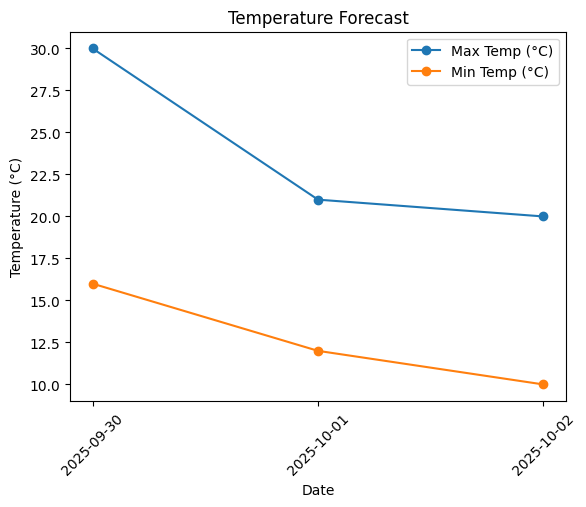

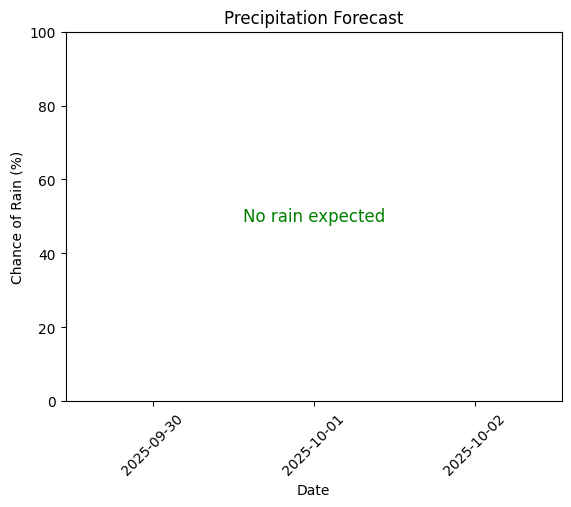

In [81]:
data = get_weather_data("New York")

create_temperature_visualisation(data)
create_precipitation_visualisation(data)




In [82]:
q = "What's the temperature in New York today?"
parsed = parse_weather_question(q)
print(parsed)

data = get_weather_data(parsed["location"])
print(generate_weather_response(parsed, data))


{'location': 'New York', 'time_period': 'today', 'attribute': 'temperature'}
None


In [83]:
location, day_choice, info_choice, button, output = weather_ui()
display(location, day_choice, info_choice, button, output)

Text(value='', description='City:', placeholder='Enter city')

Dropdown(description='Day:', options=('Today', 'Tomorrow'), value='Today')

Dropdown(description='Info:', options=('Temperature', 'Chance of Rain', 'Both'), value='Temperature')

Button(description='Get Weather', style=ButtonStyle())

Output()

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.